In [1]:
# метод опорных векторов - классификация и регрессия 
# разделяющая классификация - рисует кривую, разделяющую данные

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns 

iris = sns.load_dataset("iris")

[[4.8 1.9]
 [5.1 1.9]
 [5.1 3. ]]


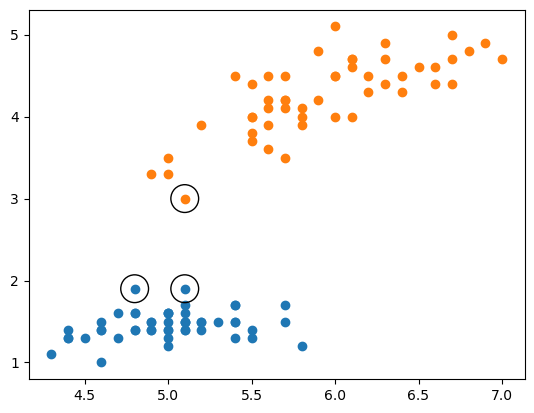

In [3]:
data = iris[["sepal_length", "petal_length", "species"]]

data_df = data[(data["species"] == "setosa") | (data["species"] == "versicolor")]

X = data_df[["sepal_length", "petal_length"]]
y = data_df["species"]

data_df_seposa = data_df[data_df["species"] == "setosa"]
data_df_versicolor = data_df[data_df["species"] == "versicolor"]

plt.scatter(data_df_seposa["sepal_length"], data_df_seposa["petal_length"])
plt.scatter(data_df_versicolor["sepal_length"], data_df_versicolor["petal_length"])

from sklearn.svm import SVC
model = SVC(kernel="linear", C=10000)
model.fit(X, y)
print(model.support_vectors_)
plt.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=400, facecolor="none", edgecolor="black")

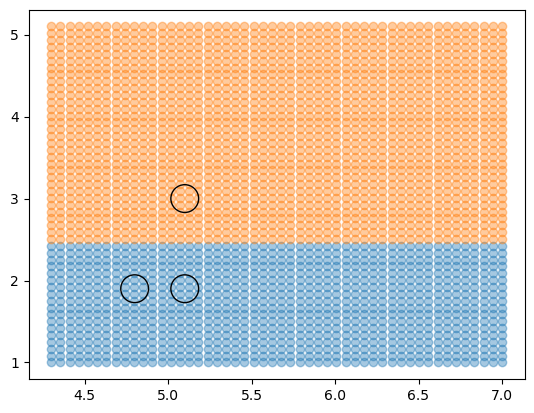

In [5]:
x1_p = np.linspace(min(data_df["sepal_length"]), max(data_df["sepal_length"]))
x2_p = np.linspace(min(data_df["petal_length"]), max(data_df["petal_length"]))
X1_p, X2_p = np.meshgrid(x1_p, x2_p)

X_p = pd.DataFrame(np.vstack([X1_p.ravel(), X2_p.ravel()]).T, columns=["sepal_length", "petal_length"])
y_p = model.predict(X_p)

X_p["species"] = y_p
X_p_setosa = X_p[X_p["species"] == "setosa"]
X_p_versicolor = X_p[X_p["species"] == "versicolor"]

plt.scatter(X_p_setosa["sepal_length"], X_p_setosa["petal_length"], alpha=0.4)
plt.scatter(X_p_versicolor["sepal_length"], X_p_versicolor["petal_length"], alpha=0.4)
plt.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=400, facecolor="none", edgecolor="black")

C:\Users\yatma\AppData\Local\Temp\ipykernel_6156\3220287605.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["species"] = iris_raw.target_names[iris["target"]]
C:\Users\yatma\AppData\Local\Temp\ipykernel_6156\3220287605.py:47: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contour(X1_p, X2_p, y_pred_full.reshape(X1_p.shape), levels=[0.5], colors="blue", linewidths=2, linestyles="--", label="full model")
C:\Users\yatma\AppData\Local\Temp\ipykernel_6156\3220287605.py:48: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contour(X1_p, X2_p, y_pred_reduced.reshape(X1_p.shape), levels=[0.5], colors="red", linewidths=2, label="reduced model")


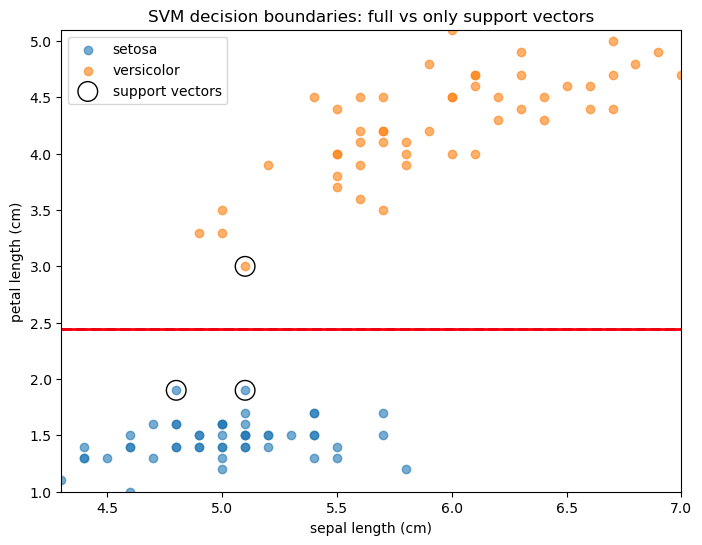

In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder

iris_raw = load_iris(as_frame=True)
iris = iris_raw.frame

data = iris[["sepal length (cm)", "petal length (cm)", "target"]]
data["species"] = iris_raw.target_names[iris["target"]]
data = data[["sepal length (cm)", "petal length (cm)", "species"]]

data_df = data[(data["species"] == "setosa") | (data["species"] == "versicolor")]
X = data_df[["sepal length (cm)", "petal length (cm)"]]
y = data_df["species"]

le = LabelEncoder()
y_encoded = le.fit_transform(y)

model_full = SVC(kernel="linear", C=10000)
model_full.fit(X, y_encoded)

support_indices = model_full.support_
support_vectors = model_full.support_vectors_

X_reduced = X.iloc[support_indices]
y_reduced = y_encoded[support_indices]

model_reduced = SVC(kernel="linear", C=10000)
model_reduced.fit(X_reduced, y_reduced)

x1_range = np.linspace(X["sepal length (cm)"].min(), X["sepal length (cm)"].max(), 300)
x2_range = np.linspace(X["petal length (cm)"].min(), X["petal length (cm)"].max(), 300)
X1_p, X2_p = np.meshgrid(x1_range, x2_range)
X_grid = pd.DataFrame(np.c_[X1_p.ravel(), X2_p.ravel()], columns=["sepal length (cm)", "petal length (cm)"])

y_pred_full = model_full.predict(X_grid)
y_pred_reduced = model_reduced.predict(X_grid)

plt.figure(figsize=(8, 6))
plt.scatter(X[y_encoded == 0]["sepal length (cm)"], X[y_encoded == 0]["petal length (cm)"], label="setosa", alpha=0.6)
plt.scatter(X[y_encoded == 1]["sepal length (cm)"], X[y_encoded == 1]["petal length (cm)"], label="versicolor", alpha=0.6)
plt.scatter(support_vectors[:, 0], support_vectors[:, 1], s=200, facecolors='none', edgecolors='black', label="support vectors")

plt.contour(X1_p, X2_p, y_pred_full.reshape(X1_p.shape), levels=[0.5], colors="blue", linewidths=2, linestyles="--", label="full model")
plt.contour(X1_p, X2_p, y_pred_reduced.reshape(X1_p.shape), levels=[0.5], colors="red", linewidths=2, label="reduced model")

plt.xlabel("sepal length (cm)")
plt.ylabel("petal length (cm)")
plt.legend()
plt.title("SVM decision boundaries: full vs only support vectors")
plt.show()


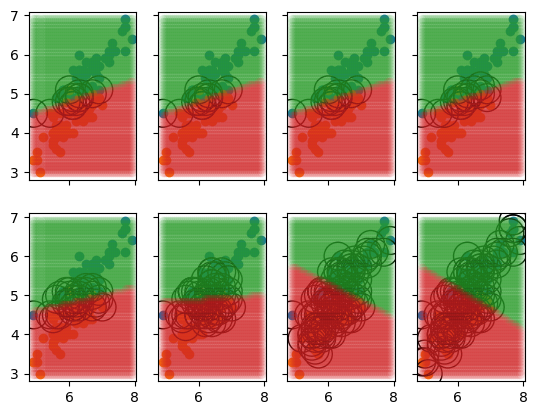

In [19]:
data = iris[["sepal_length", "petal_length", "species"]]

data_df = data[(data["species"] == "virginica") | (data["species"] == "versicolor")]

X = data_df[["sepal_length", "petal_length"]]
y = data_df["species"]

# чем меньше с, тем отступ более размытым
c_value = [[10000, 1000, 100, 10], [1, 0.1, 0.01, 0.001]]
fig, ax = plt.subplots(2, 4, sharex ='col', sharey='row')

data_df_virginica = data_df[data_df["species"] == "virginica"]
data_df_versicolor = data_df[data_df["species"] == "versicolor"]


for i in range(2):
    for j in range(4):
        x1_p = np.linspace(min(data_df["sepal_length"]), max(data_df["sepal_length"]))
        x2_p = np.linspace(min(data_df["petal_length"]), max(data_df["petal_length"]))
        X1_p, X2_p = np.meshgrid(x1_p, x2_p)
        
        X_p = pd.DataFrame(np.vstack([X1_p.ravel(), X2_p.ravel()]).T, columns=["sepal_length", "petal_length"])
        ax[i, j].scatter(data_df_virginica["sepal_length"], data_df_virginica["petal_length"])
        ax[i, j].scatter(data_df_versicolor["sepal_length"], data_df_versicolor["petal_length"])
        model = SVC(kernel="linear", C=c_value[i][j])
        model.fit(X, y)
        ax[i, j].scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=400, facecolor="none", edgecolor="black")
        X_p = X_p.drop(columns=["species"], errors="ignore")


        y_p = model.predict(X_p)
        
        X_p["species"] = y_p
        X_p_virginica = X_p[X_p["species"] == "virginica"]
        X_p_versicolor = X_p[X_p["species"] == "versicolor"]
        
        ax[i, j].scatter(X_p_virginica["sepal_length"], X_p_virginica["petal_length"], alpha=0.1)
        ax[i,j].scatter(X_p_versicolor["sepal_length"], X_p_versicolor["petal_length"], alpha=0.1)


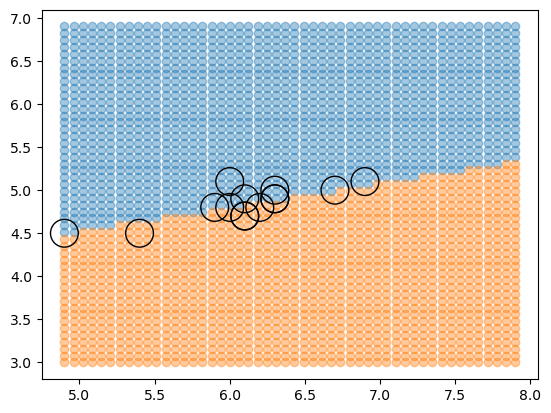

In [31]:
x1_p = np.linspace(min(data_df["sepal_length"]), max(data_df["sepal_length"]))
x2_p = np.linspace(min(data_df["petal_length"]), max(data_df["petal_length"]))
X1_p, X2_p = np.meshgrid(x1_p, x2_p)

X_p = pd.DataFrame(np.vstack([X1_p.ravel(), X2_p.ravel()]).T, columns=["sepal_length", "petal_length"])
y_p = model.predict(X_p)

X_p["species"] = y_p
X_p_virginica = X_p[X_p["species"] == "virginica"]
X_p_versicolor = X_p[X_p["species"] == "versicolor"]

plt.scatter(X_p_virginica["sepal_length"], X_p_virginica["petal_length"], alpha=0.4)
plt.scatter(X_p_versicolor["sepal_length"], X_p_versicolor["petal_length"], alpha=0.4)
plt.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=400, facecolor="none", edgecolor="black")

C:\Users\yatma\AppData\Local\Temp\ipykernel_6156\2055171685.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['species'] = species_int_df


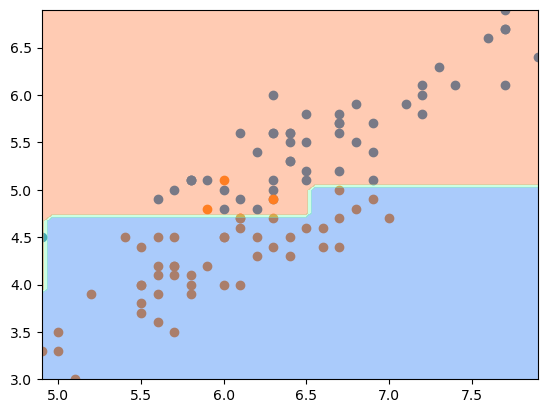

In [47]:
# деревья решений и случайные леса. сл - непараметрический алгоритм

from sklearn.tree import DecisionTreeClassifier
species_int = []
for r in iris.values:
    match r[4]:
        case 'setosa':
            species_int.append(1)
        case 'versicolor':
            species_int.append(2)
        case 'virginica':
            species_int.append(3)

species_int_df = pd.DataFrame(species_int)
data = iris[["sepal_length", "petal_length"]]
data['species'] = species_int_df

data_df = data[(data["species"] == 3) | (data["species"] == 2)]

X = data_df[["sepal_length", "petal_length"]]
y = data_df["species"]

data_df_seposa = data_df[data_df["species"] == 3]
data_df_versicolor = data_df[data_df["species"] == 2]

plt.scatter(data_df_seposa["sepal_length"], data_df_seposa["petal_length"])
plt.scatter(data_df_versicolor["sepal_length"], data_df_versicolor["petal_length"])

model = DecisionTreeClassifier(max_depth=3)
model.fit(X, y)

x1_p = np.linspace(min(data_df["sepal_length"]), max(data_df["sepal_length"]))
x2_p = np.linspace(min(data_df["petal_length"]), max(data_df["petal_length"]))
X1_p, X2_p = np.meshgrid(x1_p, x2_p)

X_p = pd.DataFrame(np.vstack([X1_p.ravel(), X2_p.ravel()]).T, columns=["sepal_length", "petal_length"])
y_p = model.predict(X_p)

X_p["species"] = y_p
X_p_setosa = X_p[X_p["species"] ==3]
X_p_versicolor = X_p[X_p["species"] == 2]
plt.contourf(X1_p, X2_p, y_p.reshape(X1_p.shape), alpha=0.4, levels=2, cmap='rainbow', zorder=1)
#plt.scatter(X_p_setosa["sepal_length"], X_p_setosa["petal_length"], alpha=0.4)
#plt.scatter(X_p_versicolor["sepal_length"], X_p_versicolor["petal_length"], alpha=0.4)
#plt.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=400, facecolor="none", edgecolor="black")